<a href="https://colab.research.google.com/github/dapooni/FilSign-action-detection/blob/main/Model_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opencv-python mediapipe scikit-learn matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 51.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 76.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 25.9 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.4
    Uninstalling protobuf-5.29.4:
      Successfully uninstalled protobuf-5.29.4
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydf 0.11.0 requires protobuf<6.0.0,>=5.29.1, but you have protobuf 4.25.7 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
grpcio-

In [ ]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [ ]:
actions = np.array(['afternoon', 'again', 'bye', 'deaf', 'dont_understand',
                    'evening', 'fast', 'fine', 'good', 'hello', 'how', 'how_much',
                    'job', 'later', 'maybe', 'morning', 'name', 'nice_to_meet',
                    'night', 'no', 'no_sign', 'please', 'see you', 'sign_language',
                    'slow', 'sorry', 'take_care', 'thank_you', 'today', 'tomorrow',
                    'understand', 'wait', 'welcome', 'what', 'when', 'where',
                    'who', 'why', 'which', 'yes', 'yesterday', 'you'])
no_sequences = 160
sequence_length = 40

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
X = np.load('/content/drive/MyDrive/Keypoints-dataset/X.npy')
y = np.load('/content/drive/MyDrive/Keypoints-dataset/y.npy')

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

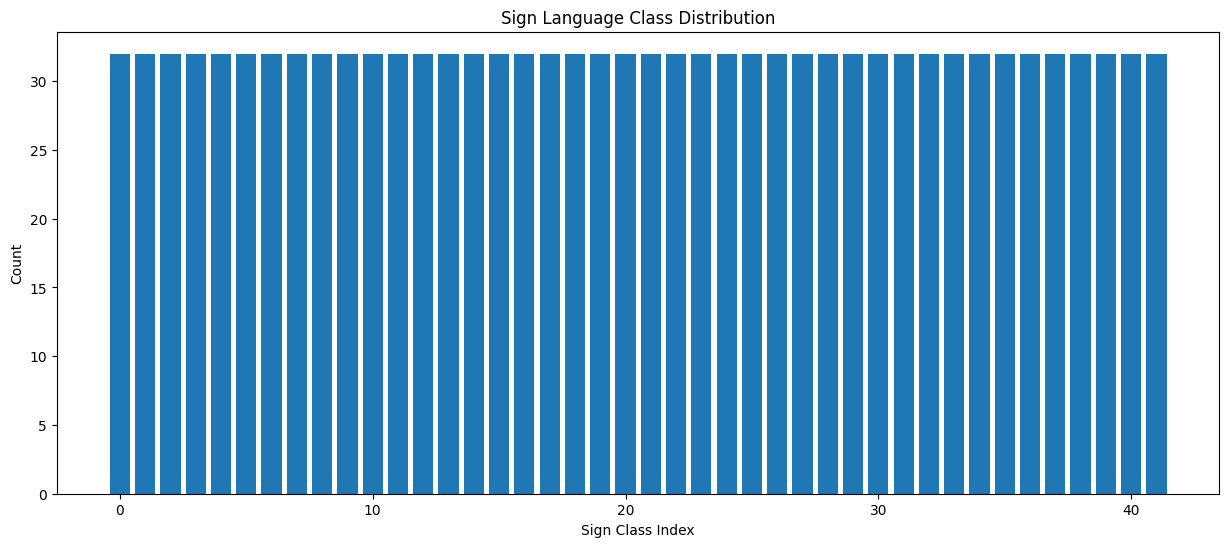

In [ ]:
# If y is one-hot encoded (12060, 201)
class_counts = np.sum(y_test, axis=0)  # Sum across examples for each class
plt.figure(figsize=(15, 6))
plt.bar(range(len(class_counts)), class_counts)
plt.title('Sign Language Class Distribution')
plt.xlabel('Sign Class Index')
plt.ylabel('Count')
plt.show()

In [ ]:
print("X shape:", X.shape)  # Expected: (num_samples, num_frames, num_features)
print("y shape:", y.shape)  # Expected: (num_samples,)

X shape: (6720, 60, 258)
y shape: (6720, 42)


In [ ]:
print("X train shape:", X_train.shape)  # Expected: (num_samples, num_frames, num_features)
print("y train shape:", y_train.shape)  # Expected: (num_samples,)
print("X test shape:", X_test.shape)  # Expected: (num_samples, num_frames, num_features)
print("y test shape:", y_test.shape)  # Expected: (num_samples,)

X train shape: (5376, 60, 258)
y train shape: (5376, 42)
X test shape: (1344, 60, 258)
y test shape: (1344, 42)


42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step
Accuracy: 0.7865
Precision: 0.8027
Recall: 0.7865
F1 Score: 0.7814


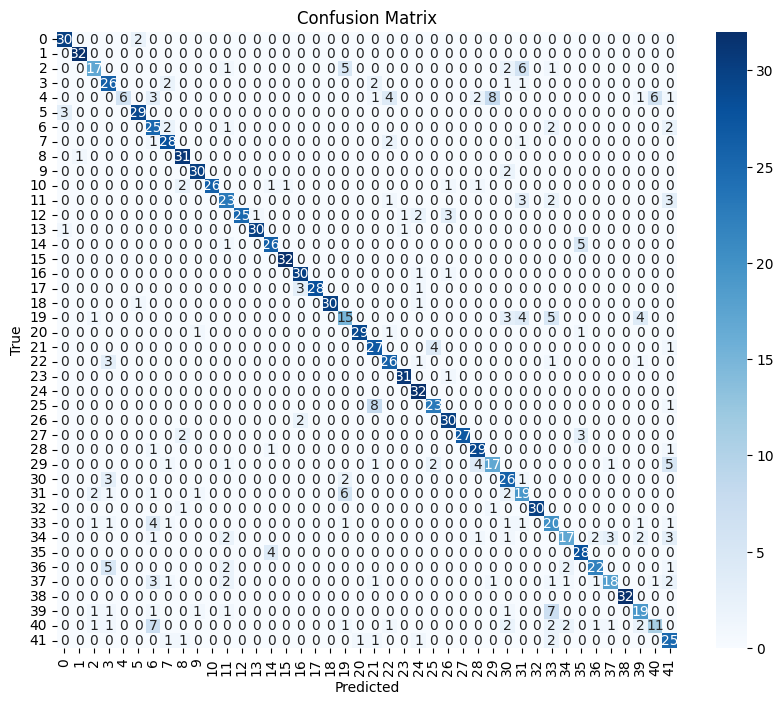


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91        32
           1       0.97      1.00      0.98        32
           2       0.74      0.53      0.62        32
           3       0.63      0.81      0.71        32
           4       1.00      0.19      0.32        32
           5       0.91      0.91      0.91        32
           6       0.53      0.78      0.63        32
           7       0.78      0.88      0.82        32
           8       0.84      0.97      0.90        32
           9       0.91      0.94      0.92        32
          10       1.00      0.81      0.90        32
          11       0.68      0.72      0.70        32
          12       1.00      0.78      0.88        32
          13       0.97      0.94      0.95        32
          14       0.81      0.81      0.81        32
          15       0.97      1.00      0.98        32
          16       0.86      0.94      0.90        32
   

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report

# Load your saved model
model = load_model('94model.h5')

# Assuming you have X_test and y_test already prepared
# Make predictions
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_test_classes = np.argmax(y_test, axis=1)  # Convert one-hot encoded labels to class indices

# Calculate metrics
accuracy = accuracy_score(y_test_classes, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test_classes, y_pred, average='weighted')

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Create and display confusion matrix
cm = confusion_matrix(y_test_classes, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(y_test.shape[1]),
            yticklabels=range(y_test.shape[1]))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print detailed classification report
print("\nClassification Report:")
print(classification_report(y_test_classes, y_pred))

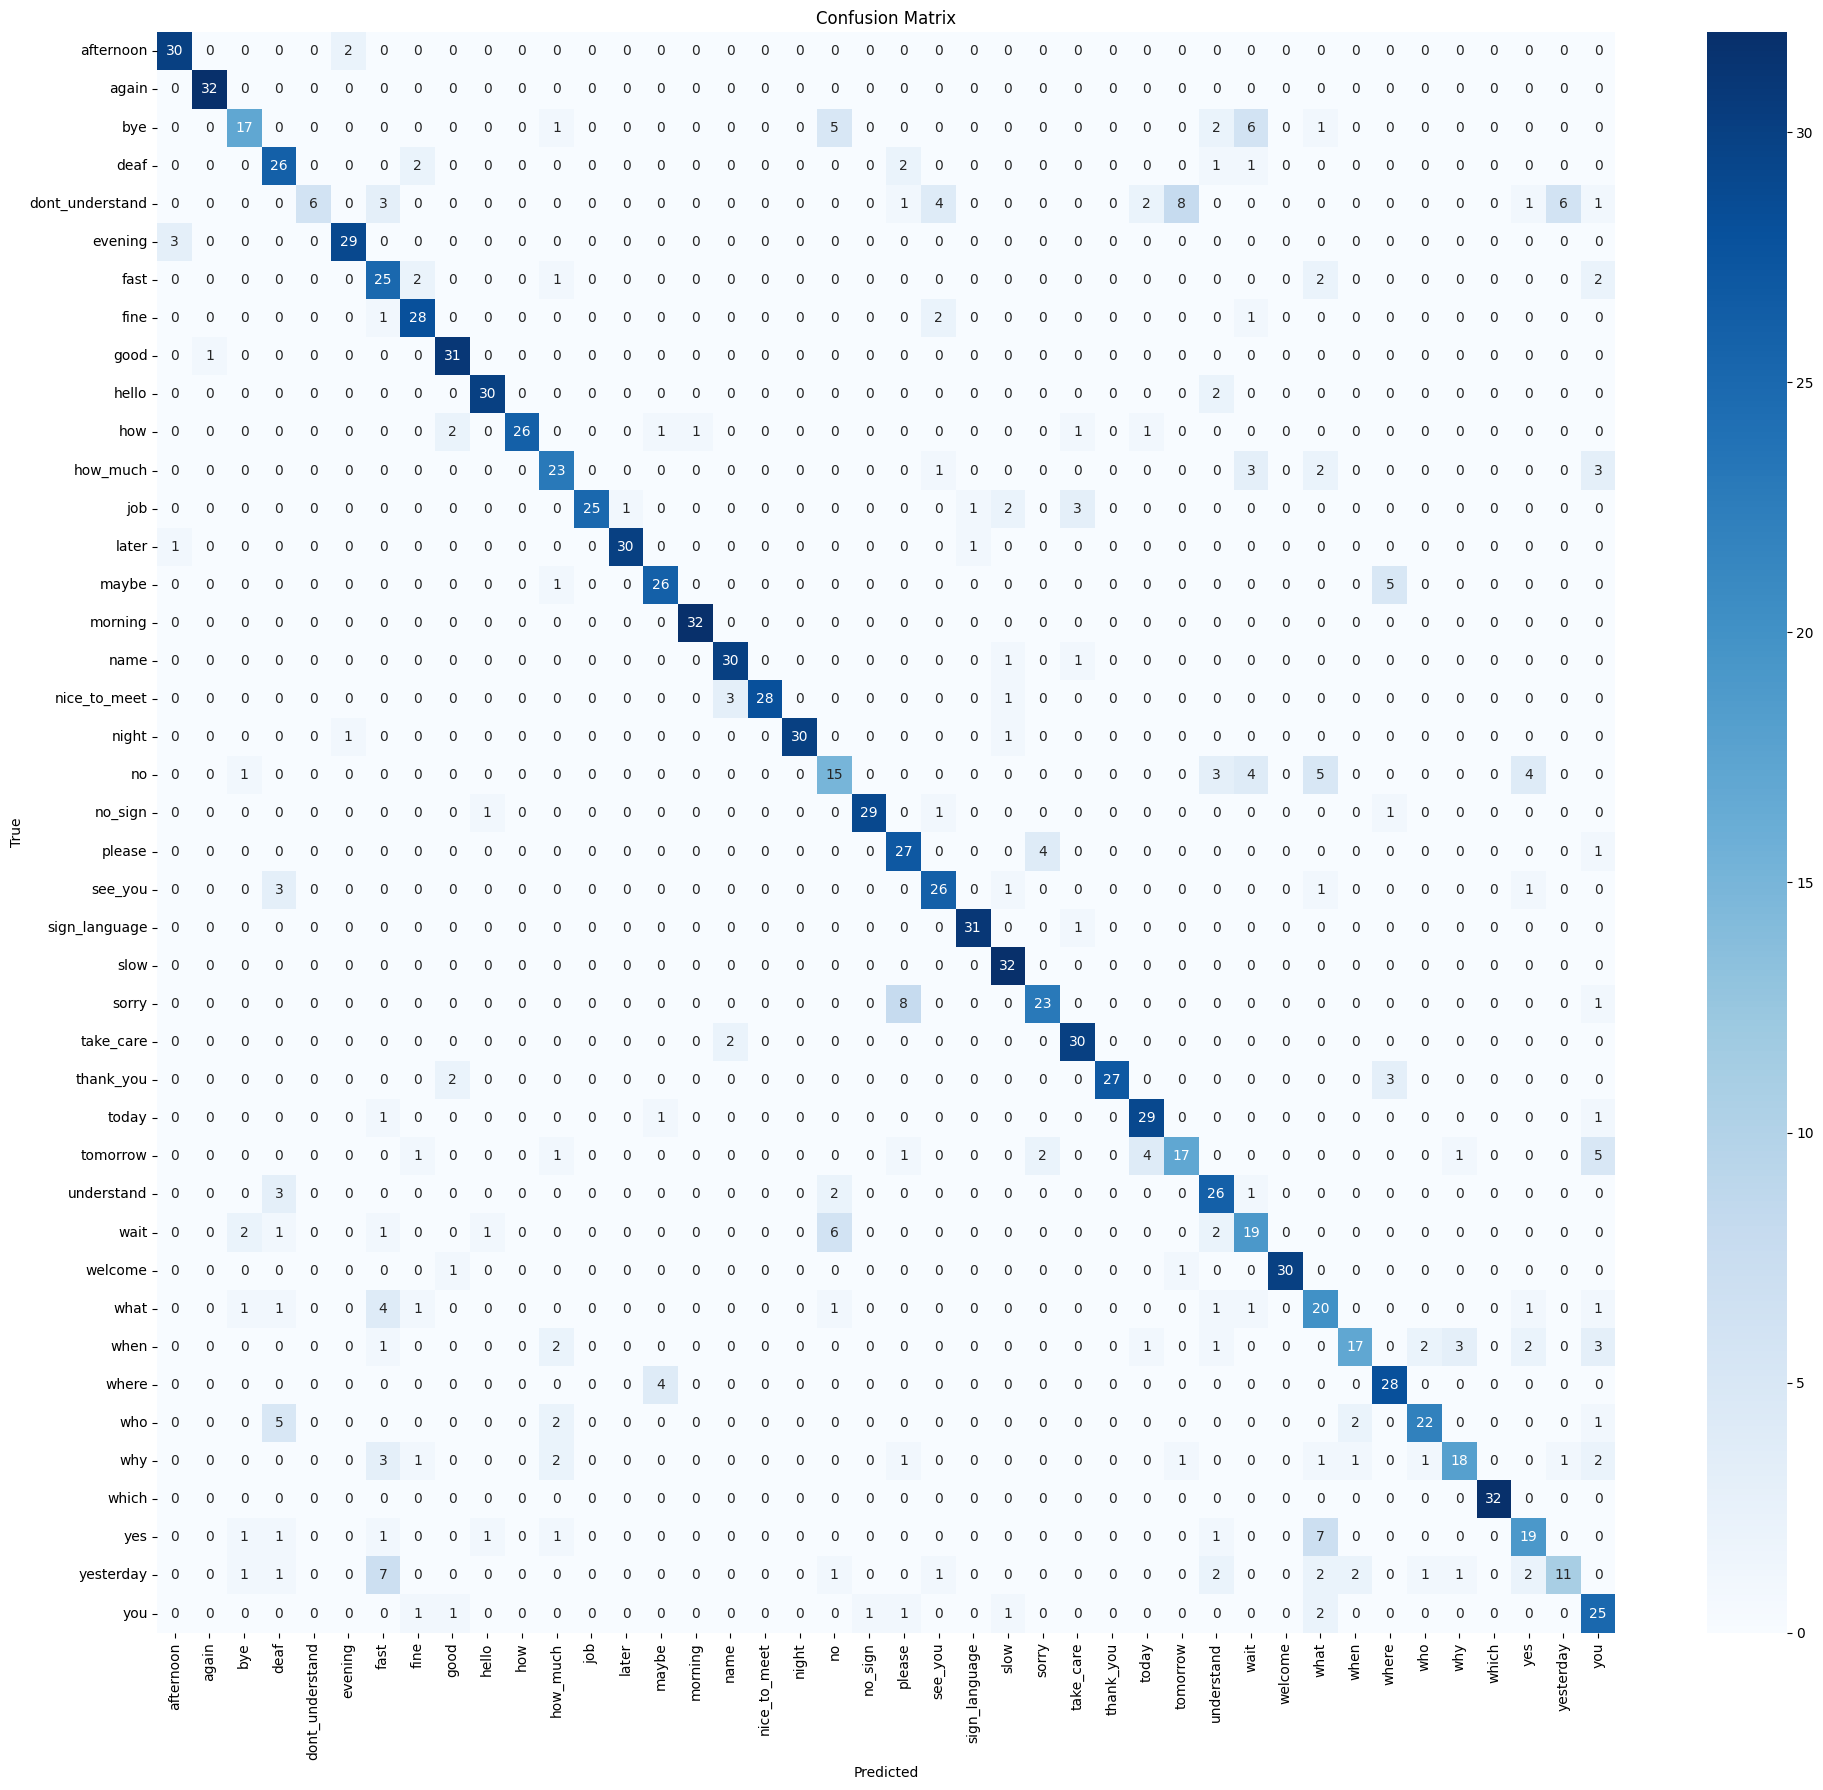


Classification Report:
                 precision    recall  f1-score   support

      afternoon       0.88      0.94      0.91        32
          again       0.97      1.00      0.98        32
            bye       0.74      0.53      0.62        32
           deaf       0.63      0.81      0.71        32
dont_understand       1.00      0.19      0.32        32
        evening       0.91      0.91      0.91        32
           fast       0.53      0.78      0.63        32
           fine       0.78      0.88      0.82        32
           good       0.84      0.97      0.90        32
          hello       0.91      0.94      0.92        32
            how       1.00      0.81      0.90        32
       how_much       0.68      0.72      0.70        32
            job       1.00      0.78      0.88        32
          later       0.97      0.94      0.95        32
          maybe       0.81      0.81      0.81        32
        morning       0.97      1.00      0.98        32
      

In [ ]:
# Modify the confusion matrix part of your code:
cm = confusion_matrix(y_test_classes, y_pred)
plt.figure(figsize=(20, 18))  # Increased figure size to fit text labels

# Define the action labels
actions = np.array(['afternoon', 'again', 'bye', 'deaf', 'dont_understand',
                    'evening', 'fast', 'fine', 'good', 'hello', 'how', 'how_much',
                    'job', 'later', 'maybe', 'morning', 'name', 'nice_to_meet',
                    'night', 'no', 'no_sign', 'please', 'see_you', 'sign_language',
                    'slow', 'sorry', 'take_care', 'thank_you', 'today', 'tomorrow',
                    'understand', 'wait', 'welcome', 'what', 'when', 'where',
                    'who', 'why', 'which', 'yes', 'yesterday', 'you'])

# Plot the confusion matrix with action labels
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=actions,  # Use action labels for x-axis
            yticklabels=actions)  # Use action labels for y-axis

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.xticks(rotation=90)  # Rotate x labels for better readability
plt.yticks(rotation=0)   # Keep y labels horizontal
plt.tight_layout()       # Adjust layout to make room for labels
plt.show()

# Also update the classification report to use action names
print("\nClassification Report:")
print(classification_report(y_test_classes, y_pred, target_names=actions))

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix

# After generating your confusion matrix
cm = confusion_matrix(y_test_classes, y_pred)

# Create a DataFrame to store the metrics for each class
metrics_df = pd.DataFrame(index=actions, columns=['TP', 'FP', 'FN', 'TN', 'Precision', 'Recall', 'F1', 'Accuracy'])

# Calculate metrics for each class
n_classes = len(actions)
for i in range(n_classes):
    # True Positives: diagonal element for this class
    TP = cm[i, i]

    # False Positives: sum of column i (excluding the diagonal element)
    FP = np.sum(cm[:, i]) - TP

    # False Negatives: sum of row i (excluding the diagonal element)
    FN = np.sum(cm[i, :]) - TP

    # True Negatives: sum of all elements except those in row i or column i
    TN = np.sum(cm) - TP - FP - FN

    # Calculate derived metrics
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    accuracy = (TP + TN) / (TP + TN + FP + FN)

    # Store in DataFrame
    metrics_df.loc[actions[i]] = [TP, FP, FN, TN, precision, recall, f1, accuracy]

# Display the metrics
print("Metrics for each class:")
print(metrics_df)

# You can also save this to a CSV file if needed
metrics_df.to_csv('class_metrics.csv')

Metrics for each class:
                 TP  FP  FN    TN Precision   Recall        F1  Accuracy
afternoon        30   4   2  1308  0.882353   0.9375  0.909091  0.995536
again            32   1   0  1311  0.969697      1.0  0.984615  0.999256
bye              17   6  15  1306   0.73913  0.53125  0.618182  0.984375
deaf             26  15   6  1297  0.634146   0.8125  0.712329  0.984375
dont_understand   6   0  26  1312       1.0   0.1875  0.315789  0.980655
evening          29   3   3  1309   0.90625  0.90625   0.90625  0.995536
fast             25  22   7  1290  0.531915  0.78125  0.632911  0.978423
fine             28   8   4  1304  0.777778    0.875  0.823529  0.991071
good             31   6   1  1306  0.837838  0.96875  0.898551  0.994792
hello            30   3   2  1309  0.909091   0.9375  0.923077   0.99628
how              26   0   6  1312       1.0   0.8125  0.896552  0.995536
how_much         23  11   9  1301  0.676471  0.71875   0.69697  0.985119
job              25   0   7

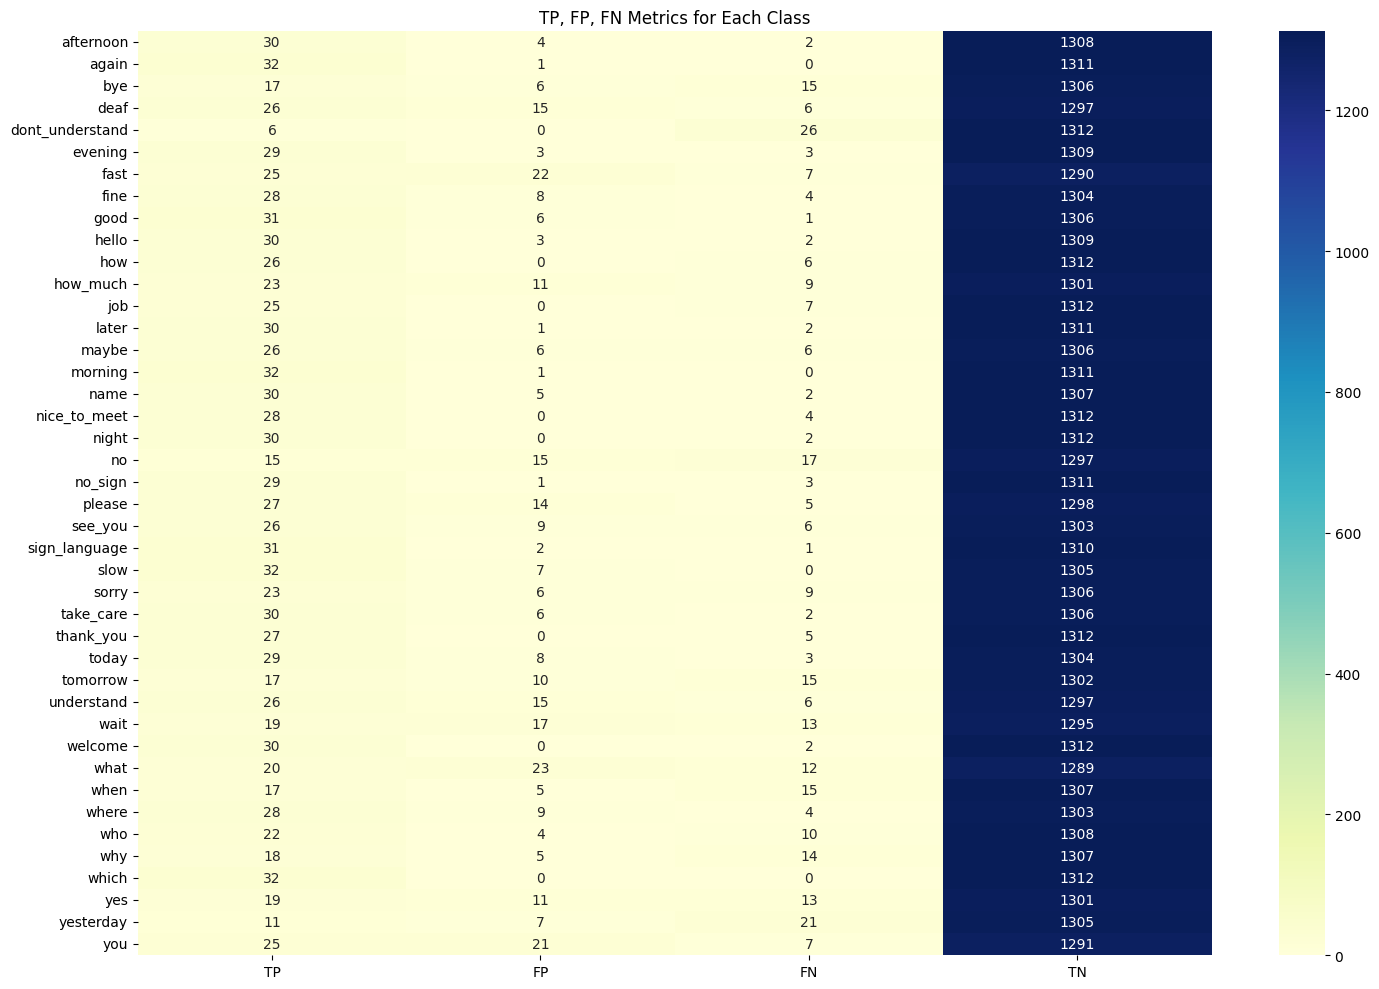

In [ ]:
# Fix for the visualization error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# After creating your metrics_df
# Convert the columns to numeric values explicitly
for col in ['TP', 'FP', 'FN', 'TN']:
    metrics_df[col] = pd.to_numeric(metrics_df[col])

# Create visualization of TP, FP, FN for each class
plt.figure(figsize=(15, 10))

# Extract just the numeric columns for visualization
vis_metrics = metrics_df[['TP', 'FP', 'FN', 'TN']].astype(float)  # Force conversion to float

# Create a heatmap
sns.heatmap(vis_metrics, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('TP, FP, FN Metrics for Each Class')
plt.tight_layout()
plt.show()

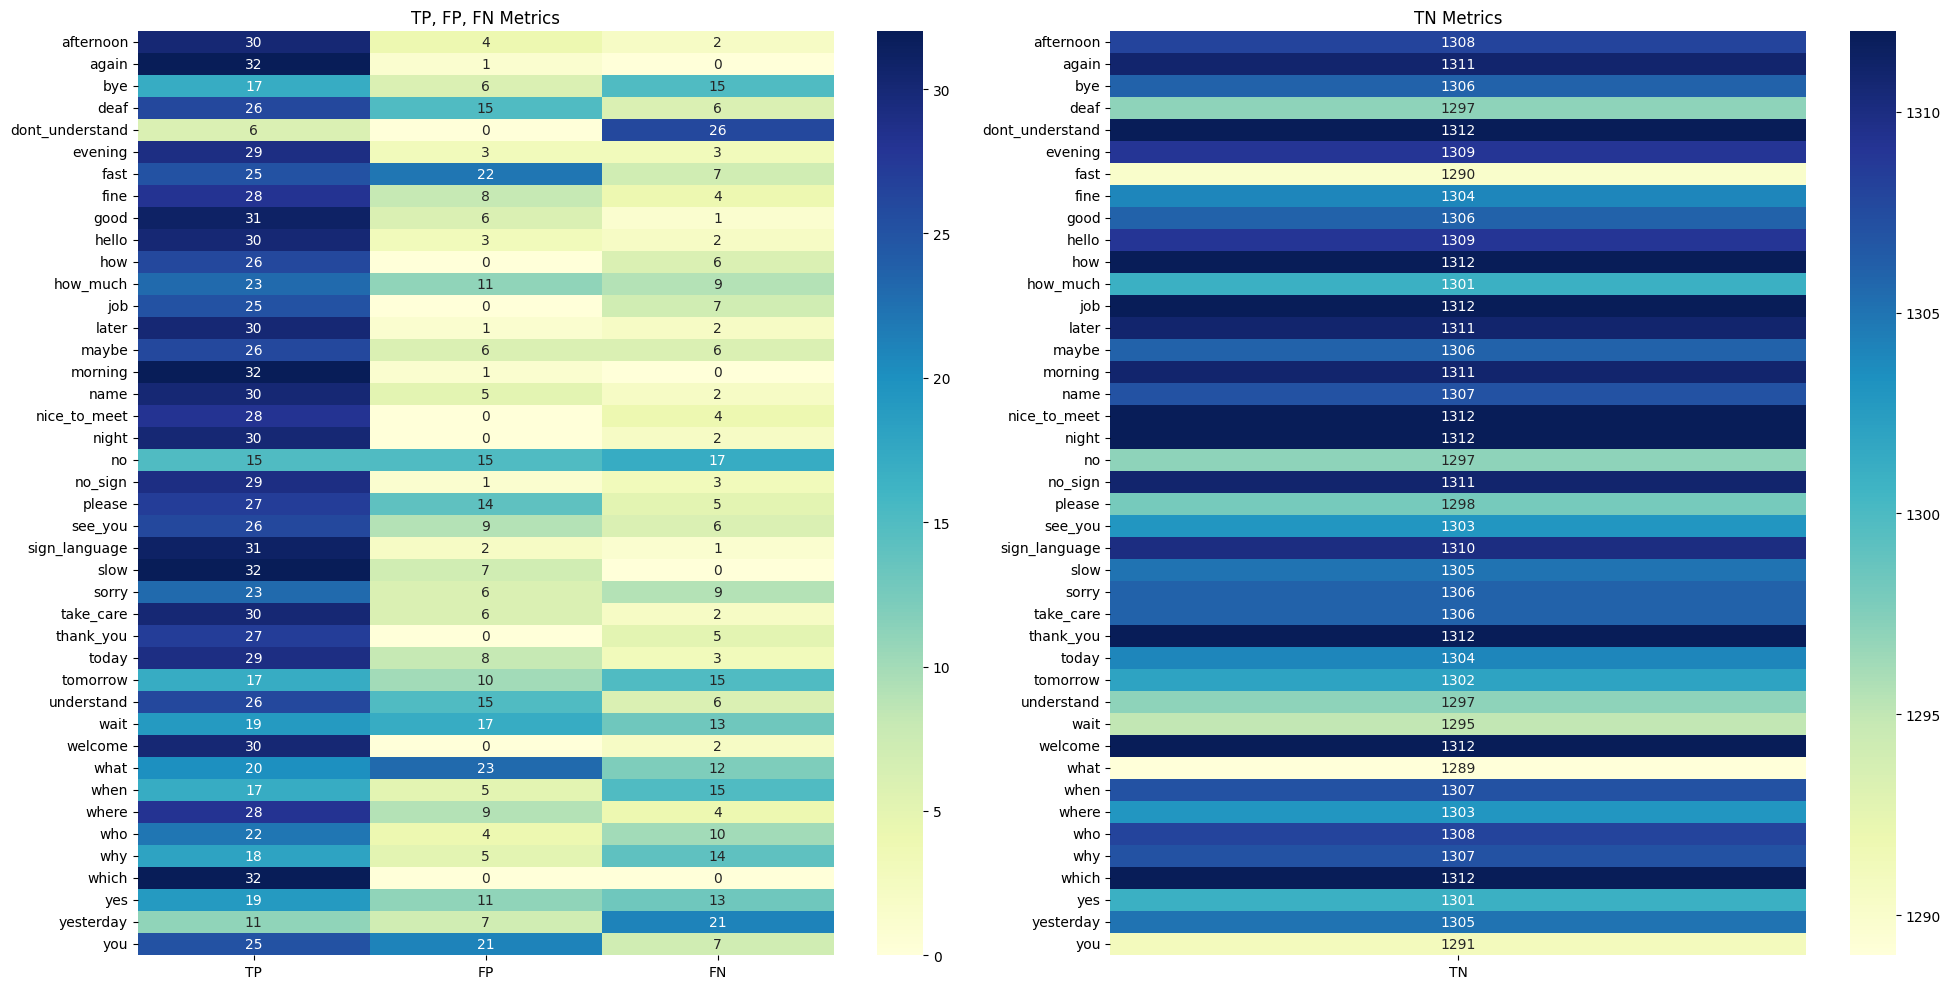

In [ ]:
# Create two separate visualizations
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Plot TP, FP, FN
sns.heatmap(metrics_df[['TP', 'FP', 'FN']].astype(float),
            annot=True, fmt='.0f', cmap='YlGnBu', ax=ax1)
ax1.set_title('TP, FP, FN Metrics')

# Plot TN separately
sns.heatmap(metrics_df[['TN']].astype(float),
            annot=True, fmt='.0f', cmap='YlGnBu', ax=ax2)
ax2.set_title('TN Metrics')

plt.tight_layout()
plt.show()

In [ ]:
def analyze_class(class_idx, y_true, y_pred, class_names):
    """Analyze a specific class showing examples of TP, FP, FN"""
    class_name = class_names[class_idx]

    # Create binary arrays for this class
    y_true_binary = (y_true == class_idx)
    y_pred_binary = (y_pred == class_idx)

    # Calculate metrics
    TP = np.sum((y_true_binary) & (y_pred_binary))
    FP = np.sum((~y_true_binary) & (y_pred_binary))
    FN = np.sum((y_true_binary) & (~y_pred_binary))
    TN = np.sum((~y_true_binary) & (~y_pred_binary))

    # Show counts
    print(f"Analysis for class: {class_name}")
    print(f"Total examples: {len(y_true)}")
    print(f"True Positives (TP): {TP}")
    print(f"False Positives (FP): {FP}")
    print(f"False Negatives (FN): {FN}")
    print(f"True Negatives (TN): {TN}")

    # Show precision, recall, etc.
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

    # Get indices of FP and FN for further analysis if needed
    fp_indices = np.where((~y_true_binary) & (y_pred_binary))[0]
    fn_indices = np.where((y_true_binary) & (~y_pred_binary))[0]

    print(f"Classes misclassified as {class_name} (FP):")
    for idx in fp_indices:
        true_class = class_names[y_true[idx]]
        print(f"  - True class: {true_class}")

    print(f"Instances of {class_name} misclassified as other classes (FN):")
    for idx in fn_indices:
        pred_class = class_names[y_pred[idx]]
        print(f"  - Predicted as: {pred_class}")

# Example usage - analyze a specific class (e.g., 'hello' which is at index 9):
analyze_class(9, y_test_classes, y_pred, actions)

Analysis for class: hello
Total examples: 1344
True Positives (TP): 30
False Positives (FP): 3
False Negatives (FN): 2
True Negatives (TN): 1309
Precision: 0.9091
Recall: 0.9375
F1-Score: 0.9231
Classes misclassified as hello (FP):
  - True class: yes
  - True class: wait
  - True class: no_sign
Instances of hello misclassified as other classes (FN):
  - Predicted as: understand
  - Predicted as: understand


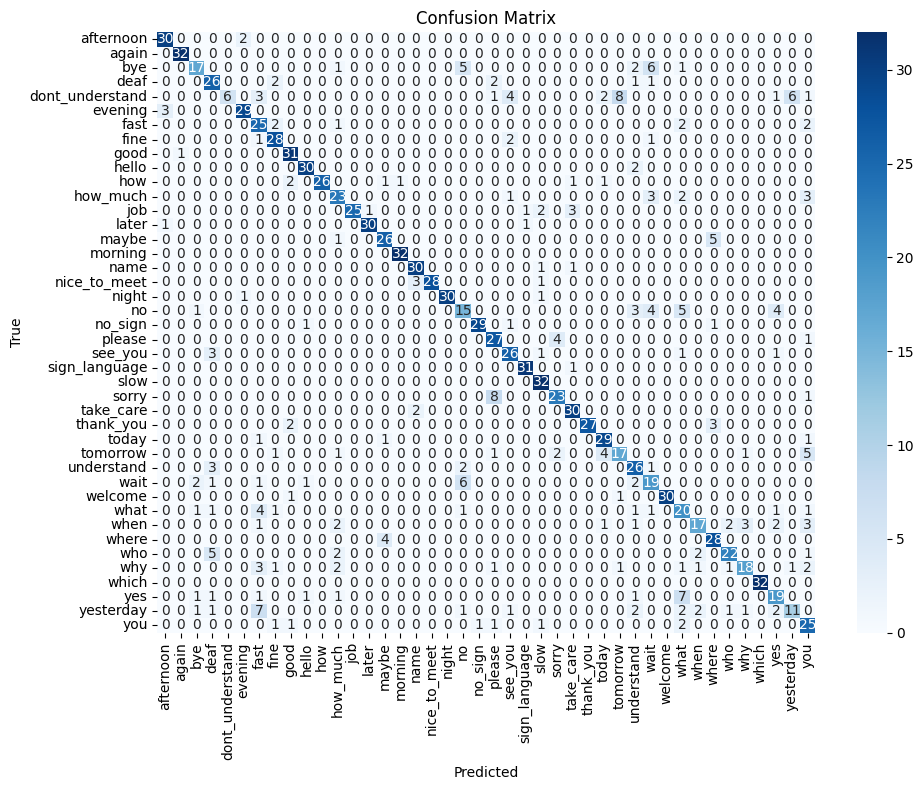

Overall Model Performance:
Accuracy: 0.7865
Weighted Precision: 0.8027
Weighted Recall: 0.7865
Weighted F1 Score: 0.7814

Classification Report:
                 precision    recall  f1-score   support

      afternoon       0.88      0.94      0.91        32
          again       0.97      1.00      0.98        32
            bye       0.74      0.53      0.62        32
           deaf       0.63      0.81      0.71        32
dont_understand       1.00      0.19      0.32        32
        evening       0.91      0.91      0.91        32
           fast       0.53      0.78      0.63        32
           fine       0.78      0.88      0.82        32
           good       0.84      0.97      0.90        32
          hello       0.91      0.94      0.92        32
            how       1.00      0.81      0.90        32
       how_much       0.68      0.72      0.70        32
            job       1.00      0.78      0.88        32
          later       0.97      0.94      0.95        32

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    precision_recall_fscore_support,
    precision_score,
    recall_score,
    f1_score
)

# First, get the confusion matrix
cm = confusion_matrix(y_test_classes, y_pred)

# Create and display confusion matrix visualization
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=actions,
            yticklabels=actions)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Now, calculate detailed per-class metrics using sklearn functions
# This avoids potential calculation errors in the manual approach
precision, recall, f1, support = precision_recall_fscore_support(y_test_classes, y_pred)

# Get accuracy for each class (one-vs-rest)
accuracy = []
n_classes = len(actions)
for i in range(n_classes):
    # Create binary arrays for this class (one-vs-rest)
    y_true_bin = (y_test_classes == i)
    y_pred_bin = (y_pred == i)
    # Calculate accuracy
    class_accuracy = (y_true_bin == y_pred_bin).mean()
    accuracy.append(class_accuracy)

# Create a DataFrame with all metrics
metrics_df = pd.DataFrame({
    'Class': actions,
    'Precision': precision,
    'Recall': recall,
    'F1': f1,
    'Accuracy': accuracy,
    'Support': support  # Number of samples for each class
})

# Calculate TP, FP, FN, TN for deeper analysis if needed
TP = np.zeros(n_classes)
FP = np.zeros(n_classes)
FN = np.zeros(n_classes)
TN = np.zeros(n_classes)

for i in range(n_classes):
    TP[i] = cm[i, i]
    FP[i] = np.sum(cm[:, i]) - TP[i]
    FN[i] = np.sum(cm[i, :]) - TP[i]
    TN[i] = np.sum(cm) - TP[i] - FP[i] - FN[i]

# Add these to the DataFrame
metrics_df['TP'] = TP
metrics_df['FP'] = FP
metrics_df['FN'] = FN
metrics_df['TN'] = TN

# Display overall metrics
print("Overall Model Performance:")
print(f"Accuracy: {(y_test_classes == y_pred).mean():.4f}")
print(f"Weighted Precision: {precision_score(y_test_classes, y_pred, average='weighted'):.4f}")
print(f"Weighted Recall: {recall_score(y_test_classes, y_pred, average='weighted'):.4f}")
print(f"Weighted F1 Score: {f1_score(y_test_classes, y_pred, average='weighted'):.4f}")

# Print the classification report for a nice summary
print("\nClassification Report:")
print(classification_report(y_test_classes, y_pred, target_names=actions))

# Sort and display per-class metrics
print("\nPer-Class Performance (sorted by F1 score):")
print(metrics_df.sort_values('F1', ascending=False).round(4))

# Save the detailed metrics to CSV
metrics_df.to_csv('detailed_class_metrics.csv', index=False)